Системы аналитических вычислений.

Лабораторная работа №2.

Студент: Саженов К.С., М8О-208Б-19

Работа была выполнена 13.03.2021 в 3:20

# Задание 1
### Вариант Б:
Метод прямоугольников и трапеций:
1. Реализовать функции вычисления интеграла методом прямоугольников и методом трапеции
1. Сделать ползунки для перебора значений входных параметров
1. Сделать вывод кадров поэтапного нахождения решения и офомрить их через список графиков
1. Сравнить полученный результат с результатом встроенной функции вычисления интегралов - `numerical_integral()`

Функция:

In [1]:
y(x) = (ln(x-2) + 1) / (x-2)
show(y(x))

(log(x - 2) + 1)/(x - 2)

График функции:

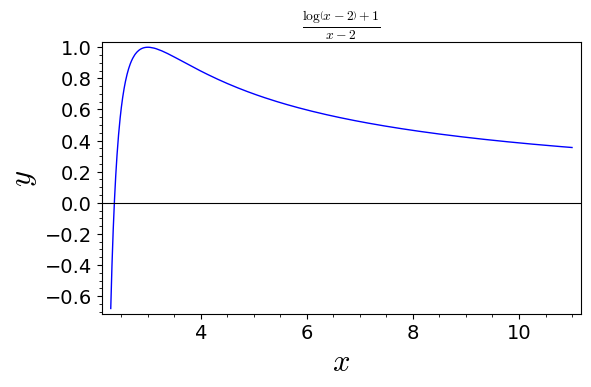

In [2]:
plot(y, (2.3, 11), axes_labels=['$x$', '$y$'], title=f'${latex(y(x))}$', frame=True, fontsize=14)

## Функция вычисления интеграла методом прямоугольников

In [3]:
import numpy as np
def rectangles_method(func, func_range, steps_count, need_plot = False):
    from_, to = func_range
    assert steps_count > 0
    assert to > from_
    
    step = (to - from_) / steps_count
    approximations = []
    intermediate_plot = plot(func, (from_, to))
    approximations.append(intermediate_plot)
    res = 0
    
    for i, x0 in enumerate(np.linspace(from_, to, steps_count), 1):
        fy = func(x0)
        cur_y = fy * step
        res += fy

        rectangle_approximation = line(matrix([
            [x0 + step, 0],
            [x0 + step, fy],
            [x0, fy],
            [x0, 0]
        ]), color = 'red')
        txt = text(f'$step={i}, current={float(cur_y):.6f}, result={float(res*step):.6f}$', (from_+2, -1), fontsize=12, color="black")
        intermediate_plot += plot(rectangle_approximation)
        approximations.append(intermediate_plot+txt)
    if need_plot:
        graphics_array(approximations, len(approximations)//2+1, 2).show(figsize=[15, 15],  ymin=0, ymax=1.5, xmin=from_-2*step, xmax=to+2*step)
    return res*step

Ползунки и прочие виджеты для удобной визуализации:

In [4]:
import ipywidgets as widgets

steps_count_widget = widgets.IntSlider(min=1, max=21, step=2, continuous_update=False, description='steps count', value=3)

range_slider = widgets.FloatRangeSlider(
    value=[2.5, 7],
    min=2.5,
    max=20,
    step=0.25,
    description='Range for function:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


interact(rectangles_method, func=widgets.fixed(y), func_range=range_slider, steps_count=steps_count_widget, need_plot=widgets.fixed(True));

Interactive function <function rectangles_method at 0x7f2861bcb5e0> with 2 widgets
  func_range: FloatRangeSli…

### Сравнение результата вычисления интеграла алгоритмом(методом) прямоугольников с результатом вычисления интеграла встроенной функцией:

In [5]:
import ipywidgets as widgets
from IPython.display import display

steps_count_widget = widgets.IntSlider(min=1, max=21, step=2, continuous_update=False, description='Steps count')
range_slider = widgets.FloatRangeSlider(
    value=[2.5, 7],
    min=2.5,
    max=20,
    step=0.25,
    description='Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)



true_label_widget = widgets.Label(value='0')
my_label_widget = widgets.Label(value='0')
diff_label_widget = widgets.Label(value='0')

vbox = widgets.VBox([true_label_widget, my_label_widget, diff_label_widget])
# vbox2 = widgets.VBox([steps_count_widget, range_slider])

hbox = widgets.HBox([vbox])

@interact
def _(func=widgets.fixed(y), func_range=range_slider, steps_count=steps_count_widget, need_plot=widgets.fixed(False)):
    my_res = rectangles_method(func, range_slider.value, steps_count, need_plot)
    x1, x2 = func_range
    value, err = numerical_integral(func, x1, x2)
    true_label_widget.value = f'True value: {value}($\\pm${err})'
    my_label_widget.value = f'Rectangle method: {my_res}'
    diff_label_widget.value = f'Difference: {abs(value-my_res)}'
display(hbox)

Interactive function <function _ at 0x7f2855e4df70> with 2 widgets
  func_range: FloatRangeSlider(value=(2.5, …

## Метод трапеций:

In [6]:
def trapezoids_method(func, func_range, steps_count, need_plot = False):
    from_, to = func_range
    assert steps_count > 0
    assert to > from_
    
    step = (to - from_) / steps_count
    approximations = []
    intermediate_plot = plot(func, (from_, to))
    approximations.append(intermediate_plot)
    res = 0
    
    for i, x0 in enumerate(np.linspace(from_, to, steps_count), 1):
        fy1 = func(x0)
        fy2 = func(x0 + step)
        cur_y = ((fy1 + fy2) / 2)
        res += cur_y
        cur_y *= step

        rectangle_approximation = line(matrix([
            [x0 + step, 0],
            [x0 + step, fy2],
            [x0, fy1],
            [x0, 0]
        ]), color = 'red')
        txt = text(f'$step={i}, current={float(cur_y):.6f}, result={float(res*step):.6f}$', (from_+2, -1), fontsize=12, color="black")
        intermediate_plot += plot(rectangle_approximation)
        approximations.append(intermediate_plot+txt)
    if need_plot:
        graphics_array(approximations, len(approximations)//2+1, 2).show(figsize=[15, 15],  ymin=0, ymax=1.5, xmin=from_-2*step, xmax=to+2*step)
    return res*step

Аналогичная визуализация, как и в методе прямоугольников:

In [7]:
import ipywidgets as widgets

steps_count_widget = widgets.IntSlider(min=1, max=21, step=2, continuous_update=False, description='steps count', value=3)

range_slider = widgets.FloatRangeSlider(
    value=[2.5, 7],
    min=2.5,
    max=20,
    step=0.25,
    description='Range for function:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


interact(trapezoids_method, func=widgets.fixed(y), func_range=range_slider, steps_count=steps_count_widget, need_plot=widgets.fixed(True));

Interactive function <function trapezoids_method at 0x7fde815ab820> with 2 widgets
  func_range: FloatRangeSli…

### Аналогичное сравнение с результатом встроенной функции вычисления интеграла:

In [8]:

steps_count_widget = widgets.IntSlider(min=1, max=21, step=2, continuous_update=False, description='Steps count:')
range_slider = widgets.FloatRangeSlider(
    value=[2.5, 7],
    min=2.5,
    max=20,
    step=0.25,
    description='Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)



true_label_widget = widgets.Label(value='0')
my_label_widget = widgets.Label(value='0')
diff_label_widget = widgets.Label(value='0')

vbox = widgets.VBox([true_label_widget, my_label_widget, diff_label_widget])
# vbox2 = widgets.VBox([steps_count_widget, range_slider])

hbox = widgets.HBox([vbox])

@interact
def _(func=widgets.fixed(y), func_range=range_slider, steps_count=steps_count_widget, need_plot=widgets.fixed(False)):
    my_res = trapezoids_method(func, range_slider.value, steps_count, need_plot)
    x1, x2 = func_range
    value, err = numerical_integral(func, x1, x2)
    true_label_widget.value = f'True value: {value}($\\pm${err})'
    my_label_widget.value = f'Rectangle method: {my_res}'
    diff_label_widget.value = f'Difference: {abs(value-my_res)}'
display(hbox)

Interactive function <function _ at 0x7fde815ab040> with 2 widgets
  func_range: FloatRangeSlider(value=(2.5, …

> Погрешность обоих методов меняется в зависимости от размера шага и является незначительной в данном контексте

# Задание 2 - gcd
1. Реализовать расширенный gcd
1. Вычислить gcd и сравнить его с результатом функции `gcd`
1. Получить представление gcd в виде $u*f + v*g$(Bézout's identity)

#### 2 вариант:
* $f = 5x^4 - 15x^3 +15x^2 - 5x$
* $g = -22x^5 + 33x^4 - 11x^3 - 99x + 99$

In [9]:
R.<x> = PolynomialRing(QQ)
f = 5*x^4 - 15*x^3 + 15*x^2 - 5*x
g = -22*x^5 + 33*x^4 - 11*x^3 - 99*x + 99

show(f)
show(g)

5*x^4 - 15*x^3 + 15*x^2 - 5*x

-22*x^5 + 33*x^4 - 11*x^3 - 99*x + 99

Функция, вычисляющая расширенный gcd:

In [10]:
def extended_gcd(a, b):
    if b < a:
        b, a = a, b
    if not a:
        return 0, 1, b
    
    x1, y1, d = extended_gcd(b%a, a)
    x = y1 - (b // a) * x1
    y = x1
    return x, y, d

In [11]:
u, v, res = extended_gcd(f, g)
print(f'gcd of f and g = {res}')
print(f'u = {u(x)}')
print(f'v = {v(x)}')

gcd of f and g = -6336/49*x + 6336/49
u = -352/175*x^3 - 1936/1225*x^2 + 4752/1225*x + 1584/245
v = -16/35*x^2 + 16/49*x + 64/49


Найдем gcd с помощью встроенной функции `gcd`:

In [12]:
inner_res = gcd(f, g)

Найдем $k$(если оно будет числом, значит мы верно определили алгоритм gcd):

In [13]:
k = inner_res/res
k

-49/6336

> $k$ является числом

Следовательно, gcd равен:

In [14]:
res*k

x - 1

Теперь ищем коэффециенты разложения Безу:

In [15]:
k1 = res * k
k2 = u * k
k3 = v* k

In [16]:
k2 * f + k3 * g

x - 1

> gcd совпал с результатом выше, что означает, что найденные коеффициенты верны и алгоритм работает корректно.